**The purpose of this project is to analyze and visualize data from the crimes reported in Mexico**

Source: https://www.kaggle.com/datasets/elanderos/official-crime-stats-mexico-2015-2023?resource=download&select=mexico_crime.csv

In [24]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Import data
crimes_in_mexico = pd.read_csv('Data/mexico_crime/mexico_crime.csv')
crimes_in_mexico.head(10)


,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
5,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With sharp weapon,January,0
6,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,In traffic accident,January,14
7,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With another element,January,0
8,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,Not specified,January,2
9,2015,1,Aguascalientes,Life and bodily integrity,Injuries,Intentional Injury,With firearm,January,2


In [26]:
#See if there is any null data or duplicate
crimes_in_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332416 entries, 0 to 332415
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   year                 332416 non-null  int64 
 1   entity_code          332416 non-null  int64 
 2   entity               332416 non-null  object
 3   affected_legal_good  332416 non-null  object
 4   type_of_crime        332416 non-null  object
 5   subtype_of_crime     332416 non-null  object
 6   modality             332416 non-null  object
 7   month                332416 non-null  object
 8   count                332416 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 22.8+ MB


**Analysis of number of crimes per different categories**

* Crimes per Year

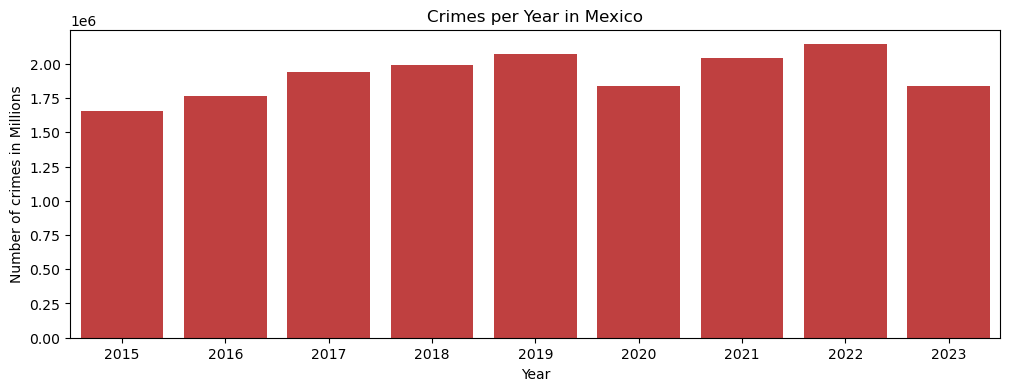

In [27]:
#Crimes per Year
plt.figure(figsize=(12,4))
ax = sns.barplot(data=crimes_in_mexico,x='year',y='count',estimator=sum,errorbar=None,color='red',saturation=0.5)
plt.title('Crimes per Year in Mexico')
#plt.ylim(0,crimes_per_year['count'].max())
plt.xlabel('Year')
plt.ylabel('Number of crimes in Millions')
plt.ticklabel_format(style='sci',axis='y')
plt.show()

* Crimes per Entity

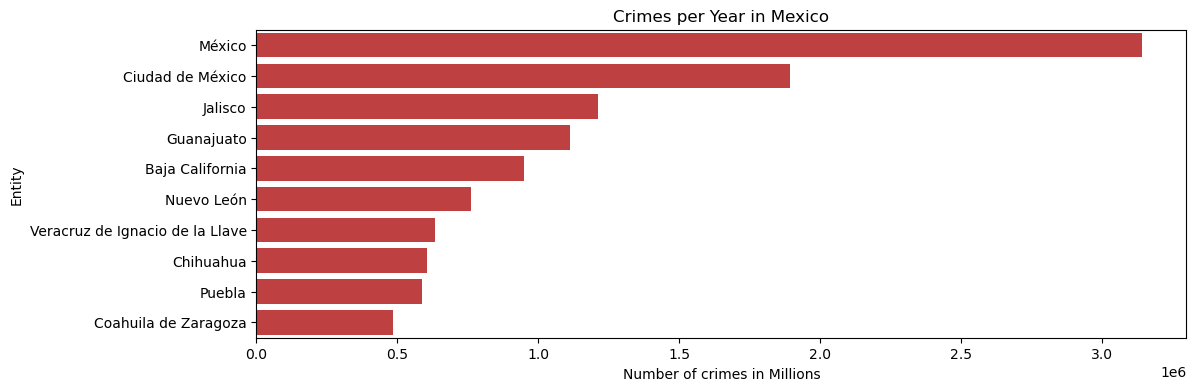

In [31]:
##Crimes in the top 10 entities
top_ten_entities[['entity','sum of crimes']] = crimes_in_mexico[['entity','count']].groupby(by='entity').sum().reset_index().sort_values(by='count',ascending=False)[:10]

plt.figure(figsize=(12,4))
ax = sns.barplot(data=top_ten_entities,y='entity',x='sum of crimes',estimator=sum,errorbar=None,color='red',saturation=0.5)
plt.title('Crimes per Year in Mexico')
#plt.ylim(0,crimes_per_year['count'].max())
plt.ylabel('Entity')
plt.xlabel('Number of crimes in Millions')
#plt.ticklabel_format(style='sci',axis='y')
plt.show()